In [1]:
pip install numpy pandas matplotlib seaborn ollama gradio

  Using cached gradio-5.34.2-py3-none-any.whl.metadata (16 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached fastapi-0.115.13-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.6.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gradio_client-1.10.3-py3-none-any.whl.metadata (7.1 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached huggingface_hub-0.33.1-py3-none-any.whl.metadata (14 kB)
  Using cached orjson-3.10.18-cp312-cp312-win_amd64.whl.metadata (43 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached ruff-0.12.0-py3-none-win_amd64.whl.metadata (26 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached starlette-0.47.1-py3-none-any.whl

  You can safely remove it manually.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = r"C:\Users\nikhi\PycharmProjects\NARESH_IT\PROJECTS_NARESH_IT\EDA_Automation\titanic_ dataset_final.csv"
df = pd.read_csv(url)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
# Display Dataaset info
print(df.describe)

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [8]:
# Missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


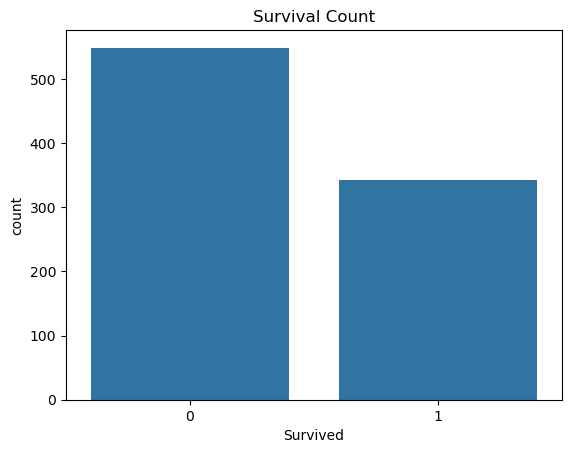

In [10]:
# Survival Rate Visualisation
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

In [15]:
import ollama

def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights \n\n {df_summary}"
    response = ollama.chat(model='mistral', messages=[{'role':'user', 'content':prompt}])
    return response['message']['content']

# Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\nAI GENERATED INSIGHT:\n", insights)


AI GENERATED INSIGHT:
  From the dataset summary provided, it appears we are analyzing the Titanic passenger data. Here are some insights based on the statistical measures:

1. The total number of unique passengers is 891.
2. The mean (average) value of Survived is approximately 0.38, suggesting that around 38% of passengers survived.
3. The average Pclass is 2.31, indicating a mix of first-class (Pclass=1), second-class (Pclass=2), and third-class (Pclass=3) passengers.
4. The mean age of passengers is approximately 29.7 years old, with a standard deviation of around 14.53 years. This suggests a wide range in ages among the passengers.
5. The average number of siblings or spouses accompanying the passenger (SibSp) is 0.52, and the average number of parents or children accompanying them (Parch) is 0.38. These numbers suggest that most passengers were traveling alone or with a minimal number of family members.
6. The mean fare for travel is approximately $32.20, with a standard deviati

In [16]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Creating a Web Interface
demo = gr.Interface(fn= eda_analysis, inputs='file', outputs='text', title= 'AI powered EDA with Mistral')

demo.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
